

# Project: Investigate a Dataset ( "No show appointments")

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [2]:
#Investigate a Dataset - for "no show appointments"

<a id='intro'></a>
## Introduction

>This data set investigation will examine a sample of data for patients records with a show and no-show appointments. 
the data determine whether there were any factors that made the Patients 
available during their appointments and the vice versa. The analysis will focus on Patients information such as the Age and whether they are part of a scholarship programs or not. The analysis will determine whether any of the factors has a major impact on Patients appointments or not.

> Through the analysis, I will take time to answer below questions: 
> 1. Does age affect the people behaviour, are they more likely to show up in appointments if they were older or younger? 
> 2. Does the combination of age and scholarship have an impact on people for showing up for appointments or not?
> 3. What location/Neighbourhood have the most patients ?
> 4. What is the percentage rate between the show and No show appointments ?


In [93]:
#within below code we are Importing Modules and Initializing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> Through the Data wrangling we are loading all the data in order to check it and study if there is missing or wrong data before cleaning. 

### General Properties

In [94]:
appt = pd.read_csv('noshowappointments.csv', encoding='latin-1') 
appt.head()
#this is to read and load the Data that i'll be working on

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> within this step, we are loading data from the "noshowappintments.Csv" excel sheet, all columns are displayed as it is listed in the data sheet 

In [95]:
appt.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> the appt.describe() function is used to convert data to numeric and it is used to Perform operations to inspect data types and look for missing data. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types. 

In [4]:
appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> within the above code , I used the data.info () function , this is to get the concise summary of the dataframe.


### Data Cleaning
> the Data cleaning is the second main step after reviewing the data. Through Data cleaning, I used the Python's Pandas and NumPy libraries to clean the data. Thus, I’ll be Dropping unnecessary columns in a Data Frame. Also, I will eliminate false information.

In [96]:
negative_age = appt[appt['Age'] < 0] #1. Replace -1 with 0 for age  
appt.Age.replace([-1],[0], inplace = True)

> This is the first data I chose to clean. The elimination of wrong information through the code above, I eliminated the negative age (-1) and replaced with Zero for baby born.  I chose to eliminate -1 as this is unrealistic and unreal data.

In [97]:

hunderedAge = appt[appt['Age'] > 100] # if age is greater than the value of right operand, then condition is true.


> on the seconed step of cleaning : I will eliminate all ages > 100. as these ages are considered rare and suspected in the data

In [98]:
# This step is related to the previous code , as we will orgnize data more 

nn = hunderedAge['PatientId'].nunique()
if(nn > 0 ) :
    appt.drop_duplicates( subset = "PatientId" , keep = False ,inplace= True) 

    #removing the duplicates with the use of the paintentId as a unique value 


> This step is related to the previous code. I organized the data by dropping the duplication with the use of a unique value 

In [99]:
appt.describe() #this is to load the Data after the cleaning

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,3.724900e+04,3.724900e+04,37249.000000,37249.000000,37249.000000,37249.000000,37249.000000,37249.000000,37249.000000
mean,1.490753e+14,5.668961e+06,36.769685,0.087197,0.197428,0.069586,0.022256,0.019115,0.334532
std,2.566529e+14,7.744951e+04,23.840851,0.282127,0.398063,0.254451,0.147516,0.151275,0.471833
min,3.920000e+04,5.134197e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.164200e+12,5.629686e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.221520e+13,5.676326e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.591210e+13,5.723165e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> This section is an approach to analyze the selected data sets to summarize the main characteristics with the use of visual methods.two research questions will be analyzed :

### Research Question 1: Does age affect the people behaviour, are they more likely to show up for appointments if they were older or younger?

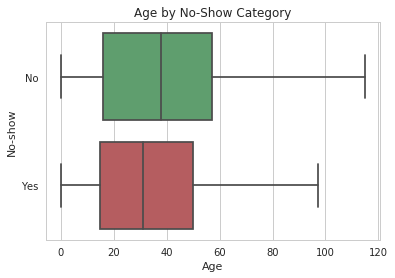

In [101]:
#the below chart is related to the AGE question. Thus, to present Data , i used the Boxplot function 
new_appt = appt
appt_viz = sns.boxplot(x="Age", y="No-show",palette=["g", "r"], data=new_appt).set_title(
    'Age by No-Show Category')


## Chart 1-Observations and findings Description : 
>From the boxplot above, we can see that the red box represent the age ranges from less than 20 to 40 . 
those group, are the highest category for not showing up to appointments. While the green box ,
shows that the people age ranges from 20 to 60 are more committed to be on time and show up on
their scheduled appointments. The data analytics were extracted from the ages 0 (baby born) to
100 as a maximum age in our Data . 
I chose the Age cause it gave me an insight and allowed me to have clear data with the relation to the age 

### Research Question 2 : Does the combination of age and scholarship have an impact on people for showing up for appointments or not?

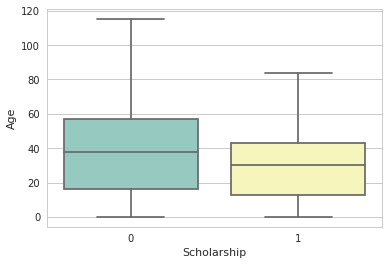

In [74]:
# The below chart has the AGE and the scholorship values combined together . This is to present if the relation between them
#will support the data

ax = sns.boxplot(x="Scholarship", y="Age", data=new_appt, palette="Set3")


## Chart 2-Observations and findings Description :
>within the above chart we combined two values together (Age and scholarship) split by the no show category. This interesting Data shows that people with no scholarship (0) with Age range (~20 – almost 60) did show up for their appointments. on the other hand, within the yellow box, it shows that people with Scholarship (1), with the Age range (~18 to 40) Did show up for their appointments. while the older ages from 40 and above did not and less than those with zero scholarship. 


 ### Research Question 3 : What location/Neighbourhood have the most patients ?

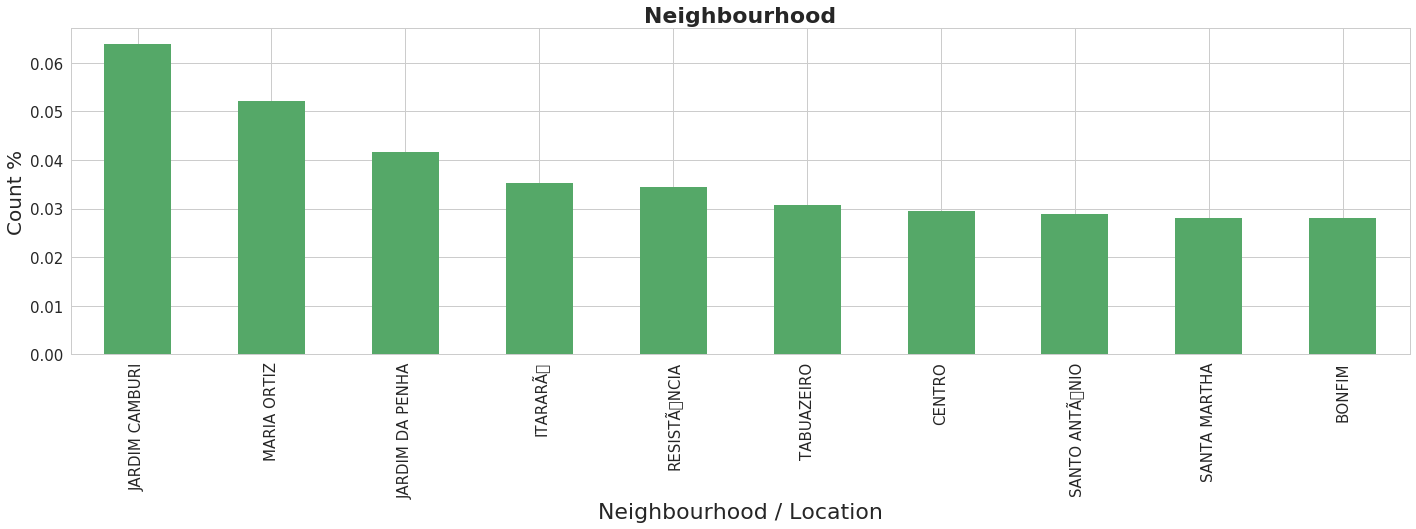

In [102]:
# Plot that shows the neighbourhood values
appt['Neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(24,6), fontsize = 15.0, color = 'g')
plt.title('Neighbourhood', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood / Location', fontsize = 22.0)
plt.show()

## Chart 3-Observations and findings Description :
>with the given above plot bar , it shows that neigbrhood JARDIM CAMBURI  has majority of the patients 

 ### Research Question 4 : What is the percentage rate between the show and No show appointment ?

18.7736583532


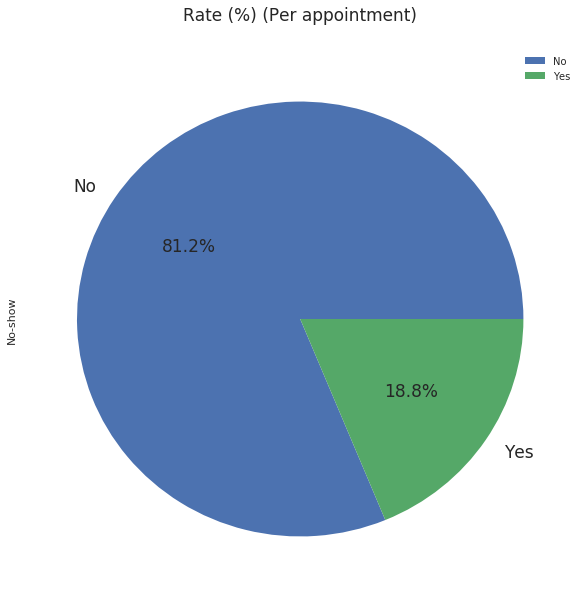

In [103]:
allP = appt['No-show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 17); #pie chart to present the data 
pieChart.set_title("Rate" + ' (%) (Per appointment)\n', fontsize = 17);
plt.legend();

## Chart 4-Observations and findings Description :
> with the given above pie-chart, it shows that 81 % of people did show up for appointments while 18% did not show up 

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

>I have created an html of this notebook in the workspace .by running  run the code on cell above. and it returned 0 